In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tushare as ts

%matplotlib inline


In [81]:
ts.set_token('ec224ad0c0b275425ed862c6b7a4978a4ff6d3e9bcf10c7ec9c5808e')
pro=ts.pro_api()


In [82]:
tcl=pro.daily(ts_code='000100.SZ',start_date='20180101',end_date='20190910')
zx=pro.daily(ts_code='600030.SH',start_date='20180101',end_date='20190910')
mj=pro.daily(ts_code='000723.SZ',start_date='20180101',end_date='20190910')

In [83]:
#将所有股票数据放到一个列表，方便concat
stock=[tcl,zx,mj]

#定义函数计算收益率
def rate(df):
    df['rate']=df['close']/df['close'].shift(1)-1
    
#定义一个设置index为日期的函数，其实可以更加简单，直接index等于就好
def set_indexs(df):
    df['trade_date']=pd.to_datetime(df['trade_date'])
    df=df.set_index(['trade_date'],inplace=True)

#运行函数，并且设置日期升序
for df in stock:
    set_indexs(df=df)
    df.sort_index(ascending=True,inplace=True)
    rate(df=df)


In [84]:
df=pd.concat(stock,axis=1,keys=['tcl','zx','mj'])

In [85]:
#利用reindex选出列
test=df.reindex(columns=['rate'],level=1)


In [86]:
#计算时间测试
from datetime import datetime
time=datetime(2019,9,10)-datetime(2018,1,1)
sum_rate=test.mean()*617

In [87]:
prets=[]
pvols=[]
for i in range(2500):
    weights=np.random.random(3)
    weights/=np.sum(weights)
    prets.append(np.sum(test.mean()*weights)*617)
    pvols.append(np.sqrt(np.dot(weights.T,np.dot(test.cov()*617,weights))))
prets=np.array(prets)
pvols=np.array(pvols)

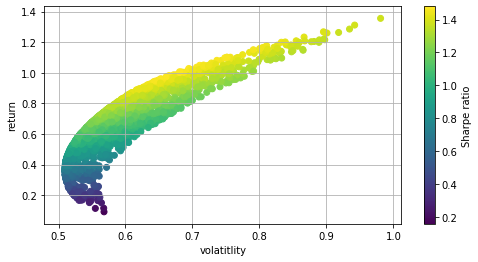

In [88]:
plt.figure(figsize=(8,4))
plt.scatter(pvols,prets,c=prets/pvols,marker='o')
plt.grid(True)
plt.xlabel('volatitlity')
plt.ylabel('return')
plt.colorbar(label='Sharpe ratio')

